In [1]:
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 59.3 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 127 kB/s eta 0:00:01
     |████████████████████████████████| 244 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 103 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 58.0 MB/s eta 0:00:01
     |█████████████████████████

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## US009

### (1) Introduction
As a Green Space Manager (GSM), optimizing resource expenditure is a priority, and understanding water consumption costs within parks is cucial  for efficient budget management. In this user storie, the aim is to conduct a statistical analysis using the "water consumption.csv" data sheet. Our objectives include visualizing monthly consumption, computing average costs, scrutinizing daily usage, and comparing statistical indicators between parks. Through this analysis, we seek to provide actionable insights for effective water management within green spaces.

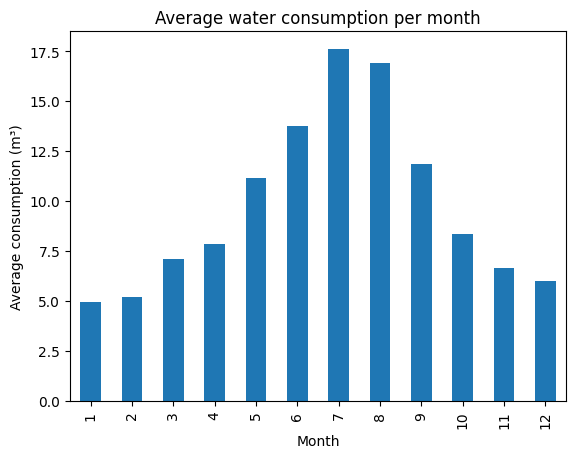

In [3]:
# Read the data from the CSV file
data = pd.read_csv('water_consumption.csv', sep=';')

# Replace commas with periods and convert to float
data['Consumption'] = data['Consumption'].str.replace(',', '.').astype(float)

# Get user inputs
year = int(input("Enter the year: "))
start_month = int(input("Enter the start month: "))
end_month = int(input("Enter the end month: "))
park = input("Enter the park identification: ")

# Filter the data based on user inputs
filtered_data = data[(data['Year'] == year) & (data['Month'] >= start_month) & (data['Month'] <= end_month) & (data['Park'] == park)]

# Create a bar plot with the filtered data
filtered_data.groupby('Month')['Consumption'].mean().plot(kind='bar')
plt.ylabel('Average consumption (m³)')
plt.title('Average water consumption per month')
plt.show()

### (3) Analisis and interpertation of the results
#### US09 - first part
This section creates a bar plot illustrating the average monthly water usage for a selected park, within a user-chosen year and specified months for analysis.

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('water_consumption.csv', sep=';')

# Replace commas with periods and convert to float
data['Consumption'] = data['Consumption'].str.replace(',', '.').astype(float)

# Get user inputs
num_parks = int(input("Enter the number of parks to be analyzed: "))
park_ids = []
for i in range(num_parks):
    park_id = input("Enter the park identification: ")
    park_ids.append(park_id)

# Filter the data based on user inputs
filtered_data = data[data['Park'].isin(park_ids)]

# Calculate the average monthly costs for each park
average_costs = filtered_data.groupby(['Park', 'Month'])['Consumption'].mean()

# Print the average costs for each park
for park_id in park_ids:
    print(f"Average monthly costs for Park {park_id}:")
    print(average_costs[park_id])

### (3) Analisis and interpertation of the results
#### US09 - second part
This segment of the user story 9 presents the average consumption for each month across the parks selected for analysis. The user has the option to analyze one or multiple parks simultaneously.

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('water_consumption.csv', sep=';')

# Replace commas with periods and convert to float
data['Consumption'] = data['Consumption'].str.replace(',', '.').astype(float)

# Filter out parks with null consumption values
filtered_data = data[data['Consumption'].notnull()]

# --- Find highest and lowest consumption parks ---
# Calculate total consumption for each park
total_consumption = filtered_data.groupby('Park')['Consumption'].sum()

# Identify the park with the most consumption
max_park = total_consumption.idxmax()

# Identify the park with the least consumption
min_park = total_consumption.idxmin()

# Filter the data to include only the parks with the most and least consumption
filtered_parks = filtered_data[filtered_data['Park'].isin([max_park, min_park])]

# --- Calculate the mean, median, standard deviation, and the coefficient of skewness ---
# Calculate statistical indicators for these parks
park_stats = filtered_parks.groupby('Park')['Consumption'].agg(['mean', 'median', 'std', 'skew'])

# Print the statistical indicators
park_stats = park_stats.reset_index()
display(park_stats)

# --- Build relative and absolute frequency tables (classified data), considering 5 classes ---
# Calculate total number of observations for each park
total_observations_max_park = filtered_data[filtered_data['Park'] == max_park]['Consumption'].count()
total_observations_min_park = filtered_data[filtered_data['Park'] == min_park]['Consumption'].count()

# Calculate relative frequency tables for each park
highest_freq_table = pd.cut(filtered_data[filtered_data['Park'] == max_park]['Consumption'], bins=5).value_counts().sort_index()
lowest_freq_table = pd.cut(filtered_data[filtered_data['Park'] == min_park]['Consumption'], bins=5).value_counts().sort_index()

# Create DataFrames for the frequency tables
highest_freq_df = pd.DataFrame({
    'Consumption Intervals': highest_freq_table.index,
    'Absolute Freq.': highest_freq_table.values,
})

lowest_freq_df = pd.DataFrame({
    'Consumption Intervals': lowest_freq_table.index,
    'Absolute Freq.': lowest_freq_table.values,
})

# Calculate relative frequency
highest_freq_df['Relative Freq.'] = highest_freq_df['Absolute Freq.'] / total_observations_max_park
lowest_freq_df['Relative Freq.'] = lowest_freq_df['Absolute Freq.'] / total_observations_min_park

# Print the frequency tables
print(f"\nFrequency table for {max_park}:")
display(highest_freq_df)

print(f"\nFrequency table for {min_park}:")
display(lowest_freq_df)

# --- For each park, check if the data has outliers, using the outlier definition as values that deviate from the median by more than 1.5 times the interquartile range ---

# Calculate the interquartile range for each park
q1_max_park = filtered_data[filtered_data['Park'] == max_park]['Consumption'].quantile(0.25)
q3_max_park = filtered_data[filtered_data['Park'] == max_park]['Consumption'].quantile(0.75)
iqr_max_park = q3_max_park - q1_max_park

q1_min_park = filtered_data[filtered_data['Park'] == min_park]['Consumption'].quantile(0.25)
q3_min_park = filtered_data[filtered_data['Park'] == min_park]['Consumption'].quantile(0.75)
iqr_min_park = q3_min_park - q1_min_park

# Calculate the lower and upper bounds for each park
lower_bound_max_park = q1_max_park - 1.5 * iqr_max_park
upper_bound_max_park = q3_max_park + 1.5 * iqr_max_park

lower_bound_min_park = q1_min_park - 1.5 * iqr_min_park
upper_bound_min_park = q3_min_park + 1.5 * iqr_min_park

# Check for outliers in each park
outliers_max_park = filtered_data[(filtered_data['Park'] == max_park) & ((filtered_data['Consumption'] < lower_bound_max_park) | (filtered_data['Consumption'] > upper_bound_max_park))]
outliers_min_park = filtered_data[(filtered_data['Park'] == min_park) & ((filtered_data['Consumption'] < lower_bound_min_park) | (filtered_data['Consumption'] > upper_bound_min_park))]
print(f"\nOutliers for {max_park}:")
display(outliers_max_park)

print(f"\nOutliers for {min_park}:")
display(outliers_min_park)

# --- How many outliers are there for each park? ---
num_outliers_max_park = outliers_max_park.shape[0]
num_outliers_min_park = outliers_min_park.shape[0]
print(f"\nNumber of outliers for {max_park}: {num_outliers_max_park}")
print(f"Number of outliers for {min_park}: {num_outliers_min_park}")




# --- Graphically represent data through histograms with 10 and 100 classes ---
# Plot histograms with 10 and 100 classes for each park
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
filtered_data[filtered_data['Park'] == max_park]['Consumption'].plot.hist(bins=10)
plt.title(f'Histogram - {max_park} (10 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
filtered_data[filtered_data['Park'] == max_park]['Consumption'].plot.hist(bins=100)
plt.title(f'Histogram - {max_park} (100 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
filtered_data[filtered_data['Park'] == min_park]['Consumption'].plot.hist(bins=10)
plt.title(f'Histogram - {min_park} (10 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
filtered_data[filtered_data['Park'] == min_park]['Consumption'].plot.hist(bins=100)
plt.title(f'Histogram - {min_park} (100 classes)')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### (3) Analisis and interpertation of the results
#### US09 - last part
This topic of the user story has the overall objective of this code snippet is to demonstrate how to read and analyze water consumption data for different parks. It calculates statistical indicators, builds frequency tables, checking outliers, and visualizes the data through histograms. <br>
    - Calculate the mean, median, standard deviation, and the coefficient of skewness <br>
    $
    \text{Mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
    $
    <br>
    $
    \text{Median} = \begin{cases} 
      x_{(n/2)} & \text{if } n \text{ is even} \\
      \frac{1}{2}(x_{(n/2)} + x_{(n/2 + 1)}) & \text{if } n \text{ is odd} 
    \end{cases}
    $
    <br>
    $
    \text{Standard Deviation} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
    $
    <br>
    $
    \text{Skewness} = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3}{\left(\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2\right)^{3/2}}
    $
    <br>
    <br>
    - Build relative and absolute frequency tables (classified data), considering 5 classes;<br>
    Frequency tables are a way to study a population by a certain criteria, in this case we studied the average interval of water consumption by day for the parks who have the most and the least consumption values. Absolute frequency is the number of observations associated with category $i$, ensure that:,<br>
    $
    \sum_{i=1}^{c}n_{i}=n
    $
    <br>
     and the relative frequency is the quotient between the absolute frequency of that category and the total number of observations made:<br>
     $
     f_i = n_i
     $
<br>

## US010

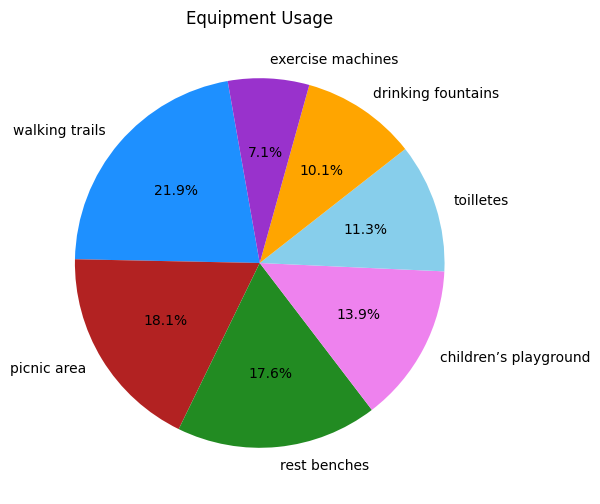

In [4]:
# Load the data from EquipmentUsed.csv
data = pd.read_csv("EquipmentUsed.csv")

# Count the frequency of each piece of equipment
equipment_counts = data['Equipment'].value_counts()

# Plotting
colors = ['dodgerblue', 'firebrick', 'forestgreen', 'violet', 'skyblue', 'orange', 'darkorchid', 'black']
plt.figure(figsize=(8, 6))
equipment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Equipment Usage')
plt.ylabel('')
plt.show()

## US011

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('Inquiry.csv', sep=';')

# Replace 'Y' and 'N' with 1 and 0, respectively
data['Y/N'] = data['Y/N'].replace({'Y': 1, 'N': 0})

# Calculate the proportion of users from each age group who would recommend the park
proportions = data.groupby('Escalao')['Y/N'].mean()

# Print the proportions
print(proportions)

# Plot the monthly frequency of park visits
plt.figure(figsize=(10, 6))
data.boxplot(column='Visits', by='Escalao')
plt.xlabel('Age Group')
plt.ylabel('Monthly Frequency of Use')
plt.title('Boxplot of Monthly Frequency of Use by Age Group')
plt.show()

# US 16


In [15]:
# Load the CSV file
data = pd.read_csv('execTimes.csv', sep = ';')

# Extract input size and execution time
input_size = data[0].values
execution_time = data[1].values

# Reshape the data for sklearn
input_size = input_size.reshape(-1, 1)

# Apply polynomial regression
polynomial_features = PolynomialFeatures(degree=2)  # You can change the degree as needed
input_size_poly = polynomial_features.fit_transform(input_size)
model = LinearRegression()
model.fit(input_size_poly, execution_time)
execution_time_pred = model.predict(input_size_poly)

# Plot the results
plt.scatter(input_size, execution_time, color='blue', label='Original data')
plt.plot(input_size, execution_time_pred, color='red', label='Polynomial fit')
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.savefig('polynomial_regression_fit.png')
plt.show()


KeyError: 0